In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def formatSums(weights):
    sums = [ weights[0] ]
    for i in xrange(1, len(weights)):
        sums.append(sums[-1] + weights[i])
    return sums

def binSearch(sums, l, r, S):
    start = l;
    if start > 0:
        S += sums[start - 1]
    while True:
        mid = l + (r - l) / 2
        if sums[mid] > S:
            if l >= mid:
                return start
            r = mid
        else:
            if mid == r - 1 or sums[mid + 1] > S:
                return mid + 1
            l = mid
            
def bucketsCount(sums, start, end, S):
    partsCount = 0
    while start < end:
        pos = binSearch(sums, start, end, S)
        if pos == start:
            return -1
        start = pos
        partsCount += 1
    return partsCount

def buckets(sums, start, end, S, parts):
    while start < end:
        pos = binSearch(sums, start, end, S)
        parts.append(pos - start)
        start = pos

def partition(weights, count):
    size = len(weights)
    
    i = 0
    j = 0
    iB = 0
    jB = 0
    SB = 2 * sum(weights)

    sums = formatSums(weights)

    while i < size and j < size:
        S = sums[j]
        if i > 0:
            S -= sums[i - 1]
        leftParts = bucketsCount(sums, 0, i, S)
        rigthParts = bucketsCount(sums, j + 1, size, S)
        if leftParts < 0 or rigthParts < 0 or leftParts + rigthParts > count - 1:
            j += 1
        else:
            if S < SB:
                iB = i
                jB = j
                SB = S
            i += 1
            if i == j:
                j += 1
            
    parts = []
    buckets(sums, 0, iB, SB, parts);
    parts.append(jB - iB + 1)
    buckets(sums, jB + 1, size, SB, parts)

    return parts

In [3]:
def printParts(weights, parts):
    begin = 0
    for part in parts:
        weightsPart = weights[begin:begin+part]
        begin += part
        print weightsPart, '=', sum(weightsPart)

def costParts(weights, parts):
    SB = 0
    begin = 0
    for part in parts:
        weightsPart = weights[begin:begin+part]
        begin += part
        S = sum(weightsPart)
        if S > SB:
            SB = S
    return SB

def predefinedSample(foo):
    ww = [
        3.0, 40.0, 17.0,
        10.0, 5.0, 17.0, 11.0, 11.0, 3.0, 1.0, 
        15.0, 17.0, 23.0, 6.0, 5.0, 
        66, 
        1.0, 1.0, 1.0, 1.0, 1.0, 62 
    ]
    parts = foo(ww, 5)
    printParts(ww, parts)
    
def randomSample(foo):
    ww = np.random.rand(20)
    parts = foo(ww, 5)
    printParts(ww, parts)
    
def scoreAlg(alg, baseline = partition, repeats = 10000, size = 100, count = 5):
    scores = []
    for i in xrange(repeats):
        weights = np.random.rand(size)
        baseParts = baseline(weights, count)
        parts = alg(weights, count)
        score = (costParts(weights, parts) - costParts(weights, baseParts)) / costParts(weights, baseParts)
        scores.append(score)
    return sum(scores) / count                                                 

In [4]:
predefinedSample(partition)

[3.0, 40.0, 17.0] = 60.0
[10.0, 5.0, 17.0, 11.0, 11.0, 3.0] = 57.0
[1.0, 15.0, 17.0, 23.0, 6.0, 5.0] = 67.0
[66, 1.0] = 67.0
[1.0, 1.0, 1.0, 1.0, 62] = 66.0


In [5]:
def allParts(size, count):
    if count == 1:
        return [[size]]
    parts = []
    for i in xrange(size + 1):
        for nextParts in allParts(size - i, count - 1):
            parts.append([i] + nextParts)
    return parts

def minimax(weights, count):
    SB = sum(weights)
    partsB = []
    for parts in allParts(len(weights), count):
        SSB = costParts(weights, parts)
        if SSB < SB:
            SB = SSB
            partsB = parts
    return partsB

In [6]:
predefinedSample(minimax)

[3.0, 40.0, 17.0] = 60.0
[10.0, 5.0, 17.0, 11.0, 11.0, 3.0] = 57.0
[1.0, 15.0, 17.0, 23.0, 6.0, 5.0] = 67.0
[66] = 66
[1.0, 1.0, 1.0, 1.0, 1.0, 62] = 67.0


In [7]:
ww = np.random.rand(30)
parts = partition(ww, 5)
printParts(ww, parts)

[ 0.63077597  0.41953264  0.16958134  0.39744007  0.8537009 ] = 2.47103091977
[ 0.8993891   0.10200362  0.55251368  0.06772391  0.59323951] = 2.21486982565
[ 0.74550317  0.35104538  0.05680016  0.08895249  0.51637994  0.29083562
  0.87398526] = 2.92350201522
[ 0.29500139  0.20228135  0.63769679  0.07619964  0.17620645  0.04761826
  0.68169842  0.6781675 ] = 2.79486979163
[ 0.78497384  0.48993738  0.26107191  0.7220026   0.57841041] = 2.8363961451


In [8]:
count = 5
size = 20
repeats = 11

fp = 0
for i in xrange(repeats):
    ww = np.random.rand(size)
    partsP = partition(ww, count)
    costP = costParts(ww, partsP)
    partsB = minimax(ww, count)
    costB = costParts(ww, partsB)
    if costP != costB:
        fp += 1
        
print fp

0


In [92]:
def fastPartition(weights, count):
    sums = formatSums(weights)
    SB = sums[-1] / count
    parts = [0]
    
    lastDelta = SB
    S = SB
    for i in xrange(len(sums)):
        delta = abs(S - sums[i])
        if delta < lastDelta:
            parts[-1] += 1
            lastDelta = delta
        if sums[i] > S:
            parts += [0]
            S += SB
            lastDelta = SB
        #print S, sums[i], delta, parts\
    
    #for k in xrange(count):
    its = 0
    SB = 0
    while True:
        newSB = costParts(weights, parts)
        if abs(newSB - SB) < 0.000001:
            break
        its += 1
        SB = newSB
        S = 0
        idx = 0
        #printParts(weights, parts)
        for i in xrange(count - 1):
            s1 = sums[idx + parts[i] - 1] - S
            s2 = sums[idx + parts[i] + parts[i + 1] - 1] - sums[idx + parts[i] - 1]
            z1 = weights[idx + parts[i] - 1]
            z2 = weights[idx + parts[i]]
            #print i,
            if s1 + z2 < SB and s1 < s2:
                parts[i] += 1
                parts[i + 1] -= 1
                #print '+',
            elif s2 + z1 < SB and s2 > s1:
                parts[i + 1] += 1
                parts[i] -= 1
                #print '-',
            S = sums[idx + parts[i] - 1]
            idx += parts[i]
            #print SB, s1, s2, z1, z2
        #print
    #print its
    return parts, its
    
#predefinedSample(fastPartition)

In [93]:
count = 30
size = 5000

In [94]:
ww = np.random.rand(size)
parts = %time partition(ww, count)
costParts(ww, parts)

CPU times: user 1.08 s, sys: 18 ms, total: 1.1 s
Wall time: 1.15 s


84.008990703019151

In [12]:
%time minimax(ww, count)

CPU times: user 1min 20s, sys: 1.47 s, total: 1min 21s
Wall time: 1min 25s


[8, 8, 9, 7, 9, 9]

In [95]:
ww = np.random.rand(size)
parts, its = %time fastPartition(ww, count)
costParts(ww, parts)

CPU times: user 5.21 ms, sys: 2.33 ms, total: 7.54 ms
Wall time: 5.84 ms


84.868263055803155

50000 15.6096404744


(array([   1.,   21.,    0.,   90.,    0.,  232.,    0.,  284.,    0.,
         185.,  102.,    0.,   53.,    0.,   24.,    0.,    6.,    0.,
           0.,    2.]),
 array([  1.  ,   1.55,   2.1 ,   2.65,   3.2 ,   3.75,   4.3 ,   4.85,
          5.4 ,   5.95,   6.5 ,   7.05,   7.6 ,   8.15,   8.7 ,   9.25,
          9.8 ,  10.35,  10.9 ,  11.45,  12.  ]),
 <a list of 20 Patch objects>)

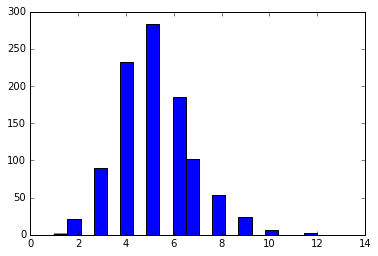

In [100]:
count = 30
size = 50000
itss = []
for i in xrange(1000):
    ww = np.random.rand(size)
    parts, its = fastPartition(ww, count)
    itss += [its]
print size, log(size)/log(2)
hist(itss, 20)

500 8.96578428466


(array([   1.,    1.,   11.,   28.,   88.,  123.,  126.,  127.,  127.,
          94.,   81.,   46.,   45.,   41.,   18.,   20.,    9.,    6.,
           5.,    3.]),
 array([-0.03324634, -0.02547507, -0.01770381, -0.00993254, -0.00216127,
         0.00560999,  0.01338126,  0.02115253,  0.0289238 ,  0.03669506,
         0.04446633,  0.0522376 ,  0.06000886,  0.06778013,  0.0755514 ,
         0.08332266,  0.09109393,  0.0988652 ,  0.10663647,  0.11440773,
         0.122179  ]),
 <a list of 20 Patch objects>)

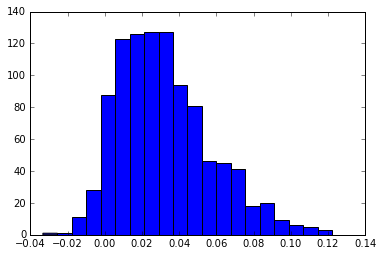

In [99]:
count = 30
size = 500
costs = []
for i in xrange(1000):
    ww = np.random.rand(size)
    parts, its = fastPartition(ww, count)
    bestParts = partition(ww, count)
    c = costParts(ww, parts)
    bestC = costParts(ww, bestParts)
    costs += [(c - bestC) / bestC]
print size, log(size)/log(2)
hist(costs, 20)

In [16]:
def histParts(weights, parts):
    SB = 0
    begin = 0
    wParts = []
    for part in parts:
        weightsPart = weights[begin:begin+part]
        begin += part
        S = sum(weightsPart)
        wParts += [weightsPart]
    df = pd.DataFrame(wParts)
    df.plot(kind='bar', stacked=True, legend=False)

+ + + + + - - + + + - - + + + + + - - - + +


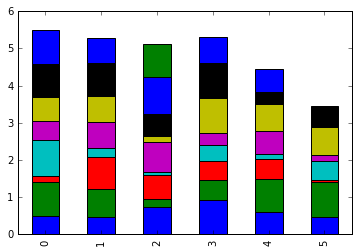

In [27]:
histParts(ww, fastPartition(ww, count))

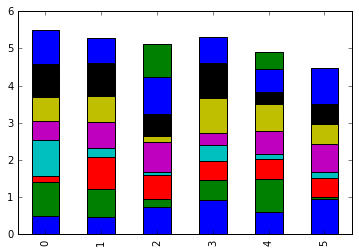

In [22]:
histParts(ww, partition(ww, count))